## Stokes flow in wallbounded geometry

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pystokes
from matplotlib.patches import Circle

### Stokeslet flow

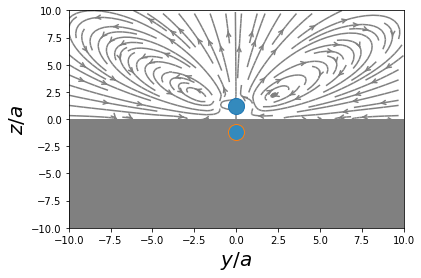

In [2]:
%matplotlib inline
#Parameter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
F = np.zeros(3*Np)
S = np.zeros(5*Np)
D = np.zeros(3*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points
vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[Nt:3*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))

h =1.2
#initialise
r[0], r[1], r[2]= 0, 0, h   #position
F[0], F[1], F[2]= 0, 0,1   # force

 
####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, Np, eta, Nt)

# instantiate the force fields
ff = pystokes.forceFields.Forces(Np)

vv=vv*0
wFlow.flowField1s(vv, rt, r, F)
vx, vy, vz = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng), vv[2*Nt:3*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()

# plot streamlines
plt.streamplot(X, Y, vy, vz, color="grey", density=1.5, arrowstyle='->', arrowsize =1)

# add other axes properties
plt.plot(r[1], r[2], marker='o', markerfacecolor='#348ABD', markersize=16 )   # plot the particle at r
plt.xlim([-L, L]); plt.ylim([-L, L])
plt.axhspan(-L, 0, facecolor='0.5', alpha=1); 
plt.plot(r[1], -r[2], marker='o', markerfacecolor='#348ABD', markersize=16 )   # plot the particle at r
plt.xlabel(r'$y/a$', fontsize=20); plt.ylabel(r'$z/a$', fontsize=20);

## X-Y plane

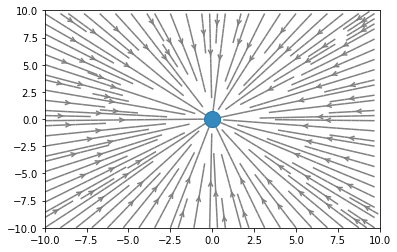

In [3]:
%matplotlib inline
#Parameter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
F = np.zeros(3*Np)
S = np.zeros(5*Np)
D = np.zeros(3*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points
vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))
rt[2*Nt:3*Nt] = h

h =1.2
#initialise
r[0], r[1], r[2]= 0, 0, h   #position
F[0], F[1], F[2]= 0, 0, 1   # force

 
####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, Np, eta, Nt)

# instantiate the force fields
ff = pystokes.forceFields.Forces(Np)

vv=vv*0
wFlow.flowField1s(vv, rt, r, F)
vx, vy, vz = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng), vv[2*Nt:3*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()

# plot streamlines
plt.streamplot(X, Y, vx, vy, color="grey", density=1.5, arrowstyle='->', arrowsize =1)

# add other axes properties
plt.plot(r[0], r[1], marker='o', markerfacecolor='#348ABD', markersize=16 )   # plot the particle at r
plt.xlim([-L, L]); plt.ylim([-L, L]);

## 2 particle near a wall: formation of a separatrix

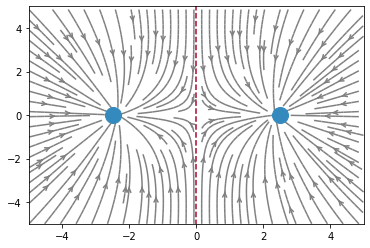

In [4]:
%matplotlib inline
#Parameter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 5, 32

Np, Nt = 2, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
F = np.zeros(3*Np)
S = np.zeros(5*Np)
D = np.zeros(3*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points
vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))
rt[2*Nt:3*Nt] = h

h =1.2
#initialise
r[0], r[1] = -L/2, L/2
r[4], r[5] = h, h   #position
F[4], F[5] = 1, 1   # force

 
####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, Np, eta, Nt)

# instantiate the force fields
ff = pystokes.forceFields.Forces(Np)

vv=vv*0
wFlow.flowField1s(vv, rt, r, F)
vx, vy, vz = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng), vv[2*Nt:3*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()

# plot streamlines
plt.streamplot(X, Y, vx, vy, color="grey", density=1.5, arrowstyle='->', arrowsize =1)

# add other axes properties
plt.plot(r[0], r[2], marker='o', color='#348ABD', markersize=16 ) 
plt.plot(r[1], r[3], marker='o', color='#348ABD', markersize=16 ) 
dd=np.linspace(-10,10,32); plt.plot(dd*0, dd, '--', color='#A60628')
plt.xlim([-L, L]); plt.ylim([-L, L]);